In [1]:
# Heart Disease Prediction — Simple Model
# Author: Shyamji Pandey
# Dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Fix random seed
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


In [6]:
# Change the path if needed (upload CSV to notebook environment)
df = pd.read_csv(r"C:\Users\shyam\Downloads\heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
target_col = "target" if "target" in df.columns else df.columns[-1]
X = df.drop(columns=[target_col])
y = df[target_col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)


In [10]:
models = {
    "logreg": (
        LogisticRegression(max_iter=1200, random_state=RANDOM_STATE),
        {"C": [0.1, 1.0, 3.0]}
    ),
    "rf": (
        RandomForestClassifier(random_state=RANDOM_STATE),
        {"n_estimators": [100, 200]}
    )
}


In [11]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

best_score, best_model, best_name = -np.inf, None, None
for name, (model, params) in models.items():
    search = GridSearchCV(model, params, scoring="roc_auc", cv=cv, n_jobs=-1)
    search.fit(X_train, y_train)
    if search.best_score_ > best_score:
        best_score, best_model, best_name = search.best_score_, search.best_estimator_, name

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)


In [12]:
print("Best model:", best_name)
print("CV ROC-AUC:", round(best_score, 4))
print("Test Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Test ROC-AUC:", round(roc_auc_score(y_test, y_prob[:, 1]), 4))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))


Best model: rf
CV ROC-AUC: 0.9989
Test Accuracy: 1.0
Test ROC-AUC: 1.0

Classification Report:

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       100
           1     1.0000    1.0000    1.0000       105

    accuracy                         1.0000       205
   macro avg     1.0000    1.0000    1.0000       205
weighted avg     1.0000    1.0000    1.0000       205



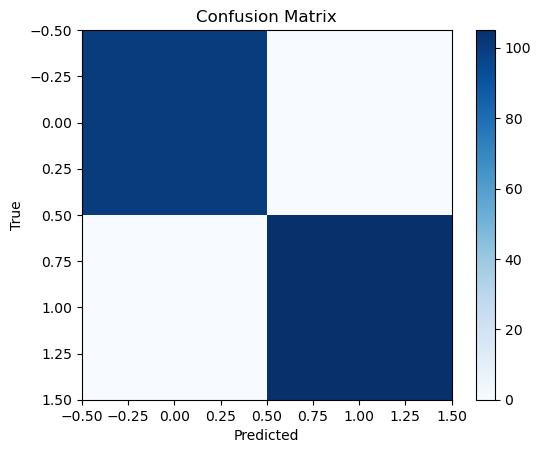

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()


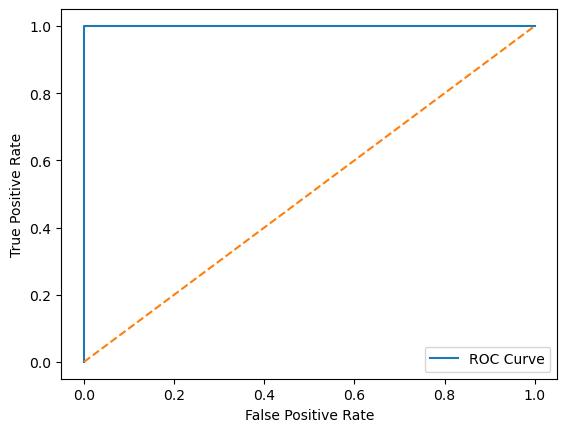

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
